In [1]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

In [2]:
subscription_key='b291068a632b416cb1df4e34480d41f8'

In [3]:
face_api_url='https://facetest34.cognitiveservices.azure.com/face/v1.0/detect'

In [4]:
image_url='https://image.ajunews.com/content/image/2020/12/16/20201216084318453203.jpg'

In [5]:
face_image = requests.get(image_url)

In [6]:
img = Image.open(BytesIO(face_image.content))

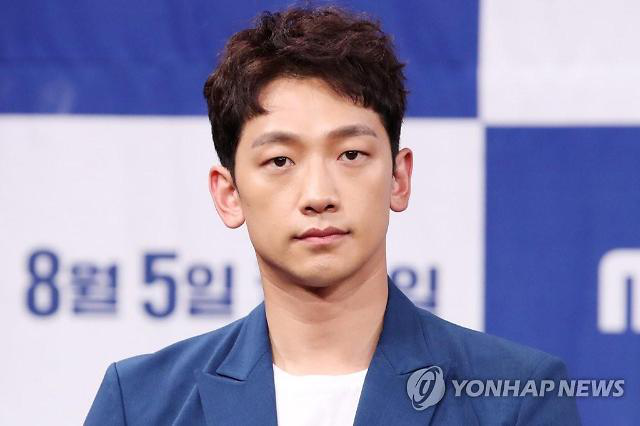

In [7]:
img

In [8]:
headers = {'Ocp-Apim-Subscription-Key' : subscription_key}

In [9]:
params = {
    'returnFaceID' : 'true',
    'returnFaceLandmarks' : 'false',
    'returnFaceAttributes' : 'emotion'
}

In [10]:
data = {'url' : image_url}

In [11]:
response = requests.post(face_api_url, params=params,
                        headers=headers, json=data)

In [12]:
faces = response.json()

In [13]:
faces

[{'faceId': '8b058f16-cca2-40e0-bb1e-a48782a69ecb',
  'faceRectangle': {'top': 114, 'left': 236, 'width': 164, 'height': 164},
  'faceAttributes': {'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.0,
    'neutral': 1.0,
    'sadness': 0.0,
    'surprise': 0.0}}}]

In [ ]:
def CreateImage(faces):
    for face in faces:
        rect = face['faceRectangle']
        left = rect['left']
        top = rect['top']
        bottom = left + rect['height']
        right = top + rect['width']
        
        draw.rectangle(((left, top), (bottom, right)), outline = 'red')
        
        face_info = face['faceAttributes']
        age = face_info['age']
        gender = face_info['gender']
        result = 'Gender:'+ gender + 'Age:' + str(age)
        
        fontX = rect['left'] + 100
        fontY = rect['height'] + 100
        
        draw.text((fontX, fontY), result, fill = 'blue')

In [ ]:
draw = ImageDraw.Draw(img)

In [ ]:
CreateImage(faces)

In [ ]:
img